In [271]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import sklearn

In [272]:
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split as tts
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, roc_curve
import warnings
warnings.filterwarnings('ignore')

In [273]:
df = pd.read_csv("heartfailure.csv")

In [274]:
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [275]:
df.shape

(299, 13)

In [276]:
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


In [277]:
df.DEATH_EVENT.value_counts()

0    203
1     96
Name: DEATH_EVENT, dtype: int64

<AxesSubplot:xlabel='DEATH_EVENT', ylabel='count'>

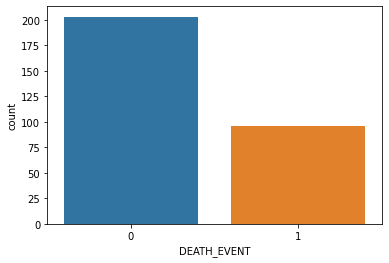

In [278]:
sns.countplot(df.DEATH_EVENT)

<AxesSubplot:xlabel='diabetes', ylabel='count'>

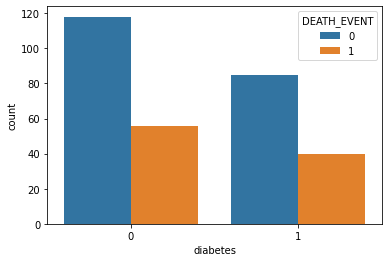

In [279]:
sns.countplot(x = 'diabetes', hue = 'DEATH_EVENT', data=df)

<AxesSubplot:xlabel='high_blood_pressure', ylabel='count'>

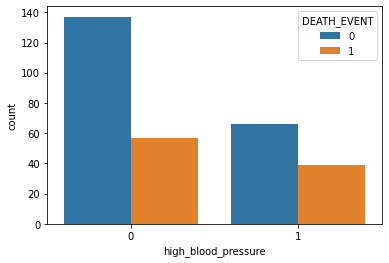

In [280]:
sns.countplot(x = 'high_blood_pressure', hue = 'DEATH_EVENT', data = df)

<AxesSubplot:xlabel='smoking', ylabel='count'>

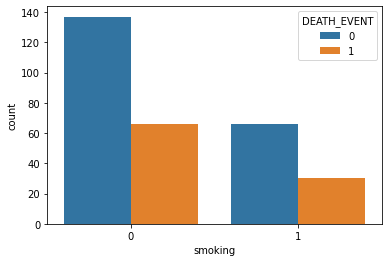

In [281]:
sns.countplot(x= 'smoking', hue= 'DEATH_EVENT', data = df)

In [282]:
df.corr()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
age,1.000000,0.088006,-0.081584,-0.101012,0.060098,0.093289,-0.052354,0.159187,-0.045966,0.065430,0.018668,-0.224068,0.253729
anaemia,0.088006,1.000000,-0.190741,-0.012729,0.031557,0.038182,-0.043786,0.052174,0.041882,-0.094769,-0.107290,-0.141414,0.066270
creatinine_phosphokinase,-0.081584,-0.190741,1.000000,-0.009639,-0.044080,-0.070590,0.024463,-0.016408,0.059550,0.079791,0.002421,-0.009346,0.062728
diabetes,-0.101012,-0.012729,-0.009639,1.000000,-0.004850,-0.012732,0.092193,-0.046975,-0.089551,-0.157730,-0.147173,0.033726,-0.001943
ejection_fraction,0.060098,0.031557,-0.044080,-0.004850,1.000000,0.024445,0.072177,-0.011302,0.175902,-0.148386,-0.067315,0.041729,-0.268603
high_blood_pressure,0.093289,0.038182,-0.070590,-0.012732,0.024445,1.000000,0.049963,-0.004935,0.037109,-0.104615,-0.055711,-0.196439,0.079351
platelets,-0.052354,-0.043786,0.024463,0.092193,0.072177,0.049963,1.000000,-0.041198,0.062125,-0.125120,0.028234,0.010514,-0.049139
serum_creatinine,0.159187,0.052174,-0.016408,-0.046975,-0.011302,-0.004935,-0.041198,1.000000,-0.189095,0.006970,-0.027414,-0.149315,0.294278
serum_sodium,-0.045966,0.041882,0.059550,-0.089551,0.175902,0.037109,0.062125,-0.189095,1.000000,-0.027566,0.004813,0.087640,-0.195204
sex,0.065430,-0.094769,0.079791,-0.157730,-0.148386,-0.104615,-0.125120,0.006970,-0.027566,1.000000,0.445892,-0.015608,-0.004316


<AxesSubplot:title={'center':'Correlation for Every Column'}>

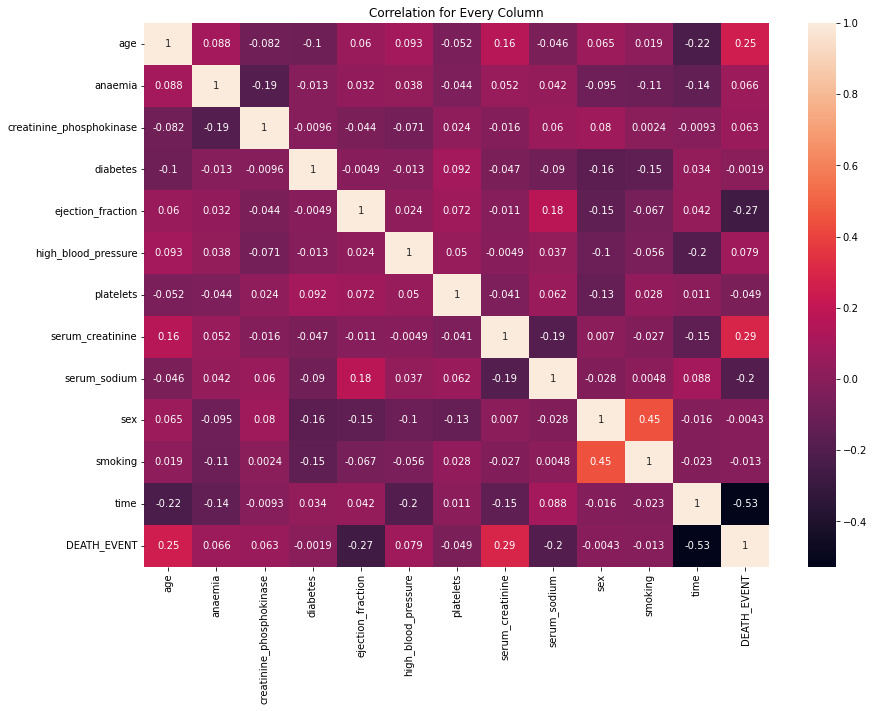

In [283]:

plt.figure(figsize= (14,10))
plt.title('Correlation for Every Column')
sns.heatmap(df.corr(),annot= True)

In [284]:
#seperate x,y

In [285]:
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [286]:
x = df.drop('DEATH_EVENT', axis =1)

In [287]:
x.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8


In [288]:
y = df['DEATH_EVENT']

In [289]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: DEATH_EVENT, dtype: int64

In [290]:
xtrain, xtest, ytrain, ytest = tts(x,y,test_size=.30,random_state = 1)

In [291]:
xtrain.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
14,49.0,1,80,0,30,1,427000.0,1.0,138,0,0,12
210,70.0,0,212,1,17,1,389000.0,1.0,136,1,1,188
236,75.0,0,119,0,50,1,248000.0,1.1,148,1,0,209
44,60.0,1,588,1,60,0,194000.0,1.1,142,0,0,33
163,50.0,1,2334,1,35,0,75000.0,0.9,142,0,0,126


In [292]:
xtrain.shape

(209, 12)

In [293]:
xtest.shape

(90, 12)

In [294]:
clf = DecisionTreeClassifier()

In [295]:
clf.fit(xtrain,ytrain)

DecisionTreeClassifier()

In [296]:
pred = clf.predict(xtest)

In [298]:
pred

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 1], dtype=int64)

In [311]:
ytest

173    0
287    0
51     1
146    0
214    0
      ..
122    0
246    1
278    0
251    0
19     1
Name: DEATH_EVENT, Length: 90, dtype: int64

In [312]:
np.array(ytest)

array([0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 1], dtype=int64)

In [313]:
classification_report(ytest, pred)

'              precision    recall  f1-score   support\n\n           0       0.84      0.91      0.87        64\n           1       0.71      0.58      0.64        26\n\n    accuracy                           0.81        90\n   macro avg       0.78      0.74      0.76        90\nweighted avg       0.80      0.81      0.80        90\n'

In [314]:
print(classification_report(ytest, pred))

              precision    recall  f1-score   support

           0       0.84      0.91      0.87        64
           1       0.71      0.58      0.64        26

    accuracy                           0.81        90
   macro avg       0.78      0.74      0.76        90
weighted avg       0.80      0.81      0.80        90



In [315]:
cm = confusion_matrix(ytest, pred)

In [316]:
cm

array([[58,  6],
       [11, 15]], dtype=int64)

Text(0.5, 1.0, 'Confusin Matrix')

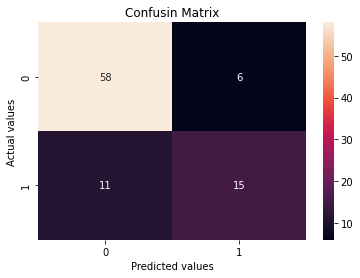

In [317]:
sns.heatmap(cm, annot= True)
plt.xlabel('Predicted values')
plt.ylabel('Actual values')
plt.title('Confusin Matrix')

In [318]:
from sklearn import metrics
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

In [319]:
precision_score(ytest, pred)

0.7142857142857143

In [320]:
metrics._classification.recall_score(ytest, pred)

0.5769230769230769

In [321]:
f1_score(ytest, pred)

0.6382978723404256

In [322]:
tp,fp,tn,fn = cm.ravel()

In [323]:
tp

58

In [324]:
tn

11

In [325]:
fp

6

In [326]:
fn

15

In [327]:
Accuracy = (tp + tn)/(tp + tn + fp + fn)

In [328]:
Accuracy

0.7666666666666667

In [329]:
Precision = tp / (tp + fp)

In [330]:
Precision

0.90625

In [331]:
Recall = tp / (tp + fn)

In [332]:
Recall

0.7945205479452054

In [333]:
Specificity = fp / (fp + tn)

In [334]:
Specificity

0.35294117647058826

In [335]:
F1_measure = (Precision + Recall) / 2

In [336]:
F1_measure

0.8503852739726028

In [337]:
F1_score = (2 * Precision * Recall ) / (Precision + Recall)

In [338]:
F1_score

0.8467153284671532

In [339]:
Selectivity = tn / (tn + fp)

In [340]:
Selectivity

0.6470588235294118

In [341]:
Threat_score = tp / (tp + fn + fp)

In [342]:
Threat_score

0.7341772151898734

In [343]:
False_Discovery_Rate = fp / (tp + fp)

In [344]:
False_Discovery_Rate

0.09375

In [345]:
#AUC

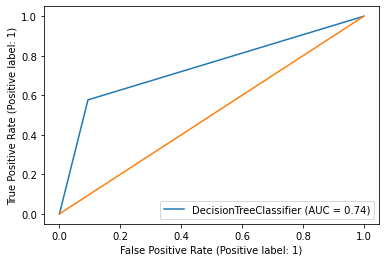

In [346]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(clf, xtest, ytest)
plt.plot([0,1],[0,1])